In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/case-study/AddressCompany.csv
/kaggle/input/case-study/AddressBuilding.csv
/kaggle/input/case-study/Company.csv
/kaggle/input/testfull/full_test.csv


In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
comp = pd.read_csv("/kaggle/input/case-study/Company.csv", sep=';')
comp.tail()

,CompanyIN,LegalFormID,LegalFormName,EmployeeLowerBound,ActivityScore,NaceCode,Nace,NaceSectionCode,NaceSection
13637,4879708,101.0,Fyz. os. podnikající dle živ. zákona,NaN,NaN,471,[471] Maloobchod v nespecializovaných prodejnách,G,[G] Velkoobchod a maloobchod; opravy a údržba ...
13638,68401981,101.0,Fyz. os. podnikající dle živ. zákona,NaN,NaN,79901,[79901] Průvodcovské činnosti,N,[N] Administrativní a podpůrné činnosti
13639,28464958,112.0,Společnost s r.o.,NaN,NaN,461,[461] Zprostředkování velkoobchodu a velkoobch...,G,[G] Velkoobchod a maloobchod; opravy a údržba ...
13640,45776016,101.0,Fyz. os. podnikající dle živ. zákona,NaN,NaN,461,[461] Zprostředkování velkoobchodu a velkoobch...,G,[G] Velkoobchod a maloobchod; opravy a údržba ...
13641,70078734,101.0,Fyz. os. podnikající dle živ. zákona,NaN,NaN,96040,[96040] Činnosti pro osobní a fyzickou pohodu,S,[S] Ostatní činnosti


In [4]:
addr_comp = pd.read_csv("/kaggle/input/case-study/AddressCompany.csv", sep=';')
addr_comp.tail()

,AddressCode,Latitude,Longitude,CompanyIN,IsHq
13648,25942611,"50,09633837","14,46312167",27927709,1
13649,25942611,"50,09633837","14,46312167",28877209,1
13650,79227732,"50,09573457","14,45169471",26846501,1
13651,79227732,"50,09573457","14,45169471",24776564,1
13652,79227732,"50,09573457","14,45169471",7121318,1


In [5]:
addr_build = pd.read_csv("/kaggle/input/case-study/AddressBuilding.csv", sep=';')
addr_build.tail()

,AddressCode,AddressText,ObjectCode,CompletedAt,UsageCode,UsageLabel,Area,FloorCount,FlatCount,ElevatorCode,ElevatorLabel
645,26035740,"Pernerova 652/55, Praha, 18600",25539973,2004-09-09T00:00:00,14,stavba pro administrativu,NaN,1.0,0.0,2.0,Bez výtahu
646,72844132,"Pobřežní 677/66, Praha, 18600",78164168,2011-06-30T00:00:00,6,bytový dům,427.0,0.0,16.0,9.0,Nezjištěno
647,74678213,"Křižíkova 684/91a, Praha, 18600",81644671,2011-06-30T00:00:00,19,jiná stavba,1288.0,3.0,0.0,9.0,Nezjištěno
648,75789507,"U Mlýnského kanálu 687/7, Praha, 18600",88444724,2016-12-21T00:00:00,6,bytový dům,2154.0,11.0,83.0,1.0,S výtahem
649,78027543,"Nekvasilova 692/29, Praha, 18600",93337329,2018-01-22T00:00:00,6,bytový dům,2416.0,13.0,135.0,1.0,S výtahem


In [6]:
combine_addr = pd.merge(comp, addr_comp, on='CompanyIN',how='outer')
combine_addr.tail()

,CompanyIN,LegalFormID,LegalFormName,EmployeeLowerBound,ActivityScore,NaceCode,Nace,NaceSectionCode,NaceSection,AddressCode,Latitude,Longitude,IsHq
14238,3298558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22698663,"50,09313725","14,44682246",0
14239,4067061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73003522,"50,09527031","14,45214754",0
14240,4487265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22768246,"50,09280518","14,4426599",0
14241,3137023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22350624,"50,09124256","14,44476609",0
14242,5978670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73021199,"50,09291979","14,45004182",0


In [7]:
combine_addr.isnull().sum()

CompanyIN                0
LegalFormID             45
LegalFormName           45
EmployeeLowerBound    8149
ActivityScore         7552
NaceCode               247
Nace                   247
NaceSectionCode        247
NaceSection            247
AddressCode              0
Latitude                 0
Longitude                0
IsHq                     0
dtype: int64

In [8]:
full_data = pd.merge(combine_addr,addr_build, on='AddressCode',how='outer')
full_data.tail(100)

,CompanyIN,LegalFormID,LegalFormName,EmployeeLowerBound,ActivityScore,NaceCode,Nace,NaceSectionCode,NaceSection,AddressCode,...,AddressText,ObjectCode,CompletedAt,UsageCode,UsageLabel,Area,FloorCount,FlatCount,ElevatorCode,ElevatorLabel
14143,66485045,101.0,Fyz. os. podnikající dle živ. zákona,NaN,NaN,G,[G] Velkoobchod a maloobchod; opravy a údržba ...,G,[G] Velkoobchod a maloobchod; opravy a údržba ...,22354981,...,"Nekvasilova 591/1, Praha, 18600",22217495.0,NaN,6.0,bytový dům,NaN,NaN,123.0,NaN,NaN
14144,88576914,101.0,Fyz. os. podnikající dle živ. zákona,0.0,NaN,62020,[62020] Poradenství v oblasti informačních tec...,J,[J] Informační a komunikační činnosti,22354981,...,"Nekvasilova 591/1, Praha, 18600",22217495.0,NaN,6.0,bytový dům,NaN,NaN,123.0,NaN,NaN
14145,40635490,101.0,Fyz. os. podnikající dle živ. zákona,NaN,NaN,G,[G] Velkoobchod a maloobchod; opravy a údržba ...,G,[G] Velkoobchod a maloobchod; opravy a údržba ...,22354981,...,"Nekvasilova 591/1, Praha, 18600",22217495.0,NaN,6.0,bytový dům,NaN,NaN,123.0,NaN,NaN
14146,2477041,101.0,Fyz. os. podnikající dle živ. zákona,0.0,NaN,58,[58] Vydavatelské činnosti,J,[J] Informační a komunikační činnosti,22354981,...,"Nekvasilova 591/1, Praha, 18600",22217495.0,NaN,6.0,bytový dům,NaN,NaN,123.0,NaN,NaN
14147,70160996,101.0,Fyz. os. podnikající dle živ. zákona,0.0,NaN,855,[855] Ostatní vzdělávání,P,[P] Vzdělávání,22354981,...,"Nekvasilova 591/1, Praha, 18600",22217495.0,NaN,6.0,bytový dům,NaN,NaN,123.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14238,60190108,101.0,Fyz. os. podnikající dle živ. zákona,NaN,NaN,69200,[69200] Účetnické a auditorské činnosti; daňov...,M,"[M] Profesní, vědecké a technické činnosti",22352791,...,"Šaldova 414/32, Praha, 18600",22215760.0,NaN,3.0,objekt k bydlení,NaN,1.0,8.0,2.0,Bez výtahu
14239,1879758,101.0,Fyz. os. podnikající dle živ. zákona,NaN,NaN,47190,[47190] Ostatní maloobchod v nespecializovanýc...,G,[G] Velkoobchod a maloobchod; opravy a údržba ...,22352791,...,"Šaldova 414/32, Praha, 18600",22215760.0,NaN,3.0,objekt k bydlení,NaN,1.0,8.0,2.0,Bez výtahu
14240,1118251,101.0,Fyz. os. podnikající dle živ. zákona,NaN,NaN,56100,"[56100] Stravování v restauracích, u stánků a ...",I,"[I] Ubytování, stravování a pohostinství",22352465,...,"Pernerova 383/29, Praha, 18600",22215468.0,NaN,5.0,objekt občanské vybavenosti,NaN,1.0,1.0,9.0,Nezjištěno
14241,2000041,101.0,Fyz. os. podnikající dle živ. zákona,NaN,NaN,47250,[47250] Maloobchod s nápoji,G,[G] Velkoobchod a maloobchod; opravy a údržba ...,22352465,...,"Pernerova 383/29, Praha, 18600",22215468.0,NaN,5.0,objekt občanské vybavenosti,NaN,1.0,1.0,9.0,Nezjištěno


In [9]:
columns = ["LegalFormName","EmployeeLowerBound","Nace", "NaceSection","NaceCode",  "NaceSection", "AddressText","CompletedAt","UsageCode", "ElevatorCode", "ElevatorLabel", "ActivityScore", "Latitude", "Longitude"]
full_data = full_data.drop(columns, axis = 1)
full_data.tail() 

,CompanyIN,LegalFormID,NaceSectionCode,AddressCode,IsHq,ObjectCode,UsageLabel,Area,FloorCount,FlatCount
14238,60190108,101.0,M,22352791,1,22215760.0,objekt k bydlení,NaN,1.0,8.0
14239,1879758,101.0,G,22352791,1,22215760.0,objekt k bydlení,NaN,1.0,8.0
14240,1118251,101.0,I,22352465,1,22215468.0,objekt občanské vybavenosti,NaN,1.0,1.0
14241,2000041,101.0,G,22352465,1,22215468.0,objekt občanské vybavenosti,NaN,1.0,1.0
14242,71974032,424.0,F,22352686,1,22215662.0,stavba pro administrativu,NaN,1.0,0.0


In [10]:
full_data = full_data.fillna(method='bfill', axis=0).fillna(0)

In [11]:
def clean_data(data):
    data.loc[data['UsageLabel'] == 'stavba pro administrativu', 'UsageLabel'] = 1
    data.loc[data['UsageLabel'] =='víceúčelová stavba',  'UsageLabel'] = 1
    data.loc[data['UsageLabel'] == 'objekt k bydlení', 'UsageLabel'] = 0
    data.loc[data['UsageLabel'] == 'bytový dům', 'UsageLabel'] = 0
    data.loc[data['UsageLabel'] == 'jiná stavba', 'UsageLabel'] = 0
    data.loc[data['UsageLabel'] == 'stavba občanského vybavení', 'UsageLabel'] = 0
    data.loc[data['UsageLabel'] == 'objekt občanské vybavenosti', 'UsageLabel'] = 0
    data.loc[data['UsageLabel'] == 'průmyslový objekt', 'UsageLabel'] = 1
    data.loc[data['UsageLabel'] == 'stavba ubytovacího zařízení', 'UsageLabel'] = 0
    data.loc[data['UsageLabel'] == 'rodinný dům', 'UsageLabel'] = 0
    data.loc[data['UsageLabel'] == 'stavba pro obchod', 'UsageLabel'] = 1
    data.loc[data['UsageLabel'] == 'stavba pro výrobu a skladování', 'UsageLabel'] = 1
    data.loc[data['UsageLabel'] == 'stavba pro dopravu', 'UsageLabel'] = 1

    

    
    
    
    
clean_data(full_data)
full_data.tail()

,CompanyIN,LegalFormID,NaceSectionCode,AddressCode,IsHq,ObjectCode,UsageLabel,Area,FloorCount,FlatCount
14238,60190108,101.0,M,22352791,1,22215760.0,0,0.0,1.0,8.0
14239,1879758,101.0,G,22352791,1,22215760.0,0,0.0,1.0,8.0
14240,1118251,101.0,I,22352465,1,22215468.0,0,0.0,1.0,1.0
14241,2000041,101.0,G,22352465,1,22215468.0,0,0.0,1.0,1.0
14242,71974032,424.0,F,22352686,1,22215662.0,1,0.0,1.0,0.0


In [12]:
full_data.drop_duplicates(subset='ObjectCode', keep='first', inplace=False)

,CompanyIN,LegalFormID,NaceSectionCode,AddressCode,IsHq,ObjectCode,UsageLabel,Area,FloorCount,FlatCount
0,2308525,105.0,M,25745468,1,25257056.0,1,513.0,1.0,0.0
101,2358093,112.0,M,27177106,1,22215565.0,1,513.0,8.0,0.0
560,2409267,112.0,A,22351426,1,22214534.0,0,155.0,1.0,6.0
571,2437562,112.0,A,22350985,1,22214143.0,0,155.0,1.0,14.0
675,2468212,112.0,L,74384597,1,80233899.0,0,1741.0,11.0,102.0
...,...,...,...,...,...,...,...,...,...,...
14230,409367,706.0,S,22351531,1,22214631.0,0,0.0,1.0,0.0
14232,70762741,105.0,M,22768157,1,22216511.0,0,0.0,1.0,7.0
14238,60190108,101.0,M,22352791,1,22215760.0,0,0.0,1.0,8.0
14240,1118251,101.0,I,22352465,1,22215468.0,0,0.0,1.0,1.0


In [13]:
full_test = pd.read_csv("/kaggle/input/testfull/full_test.csv", sep=',')
full_test = full_test.drop(columns = ['Unnamed: 0', 'UsageLabel'])

full_test.head()

,CompanyIN,LegalFormID,NaceSectionCode,AddressCode,IsHq,ObjectCode,Area,FloorCount,FlatCount
0,2308525,105.0,M,25745468,1,25257056.0,513.0,1.0,0.0
1,45503567,105.0,M,25745468,1,25257056.0,513.0,1.0,0.0
2,71470433,105.0,M,25745468,1,25257056.0,513.0,1.0,0.0
3,10170448,105.0,M,25745468,1,25257056.0,513.0,1.0,0.0
4,25805029,105.0,M,25745468,1,25257056.0,513.0,1.0,0.0


In [14]:
X = full_data
X_test = full_test
y = np.asarray(X['UsageLabel']).astype('float32')

features_num = ["CompanyIN", "LegalFormID", "AddressCode", "IsHq", "ObjectCode", "Area", "FloorCount", "FlatCount"]
features_cat =["NaceSectionCode"]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer




transformer_num = make_pipeline(
        SimpleImputer(strategy="constant"),
        StandardScaler()
)

transformer_cat = make_pipeline(
     SimpleImputer(strategy="constant", fill_value="NA"),
     OneHotEncoder(handle_unknown='ignore')
)

preprocessor = make_column_transformer(
      (transformer_num, features_num),
      (transformer_cat, features_cat),
)

In [16]:
X_train, X_valid, y_train, y_valid = \
   train_test_split(X,y,stratify=y, train_size=0.7)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)

input_shape = [X_train.shape[1]]

In [17]:
from tensorflow import keras 
from tensorflow.keras import layers 

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.7),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.7),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.7),
    layers.Dense(1,activation='sigmoid')
])

2022-03-25 18:04:07.428504: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
model.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['binary_accuracy']
)

2022-03-25 18:04:07.816479: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
39/39 [==============================] - 3s 17ms/step - loss: 1.0499 - binary_accuracy: 0.5276 - val_loss: 0.5662 - val_binary_accuracy: 0.7791
Epoch 2/200
39/39 [==============================] - 0s 9ms/step - loss: 0.8544 - binary_accuracy: 0.5928 - val_loss: 0.5356 - val_binary_accuracy: 0.7777
Epoch 3/200
39/39 [==============================] - 0s 8ms/step - loss: 0.7570 - binary_accuracy: 0.6395 - val_loss: 0.5260 - val_binary_accuracy: 0.7802
Epoch 4/200
39/39 [==============================] - 0s 8ms/step - loss: 0.6831 - binary_accuracy: 0.6743 - val_loss: 0.5124 - val_binary_accuracy: 0.7798
Epoch 5/200
39/39 [==============================] - 0s 9ms/step - loss: 0.6417 - binary_accuracy: 0.7044 - val_loss: 0.5021 - val_binary_accuracy: 0.7814
Epoch 6/200
39/39 [==============================] - 0s 8ms/step - loss: 0.6243 - binary_accuracy: 0.7204 - val_loss: 0.4886 - val_binary_accuracy: 0.7807
Epoch 7/200
39/39 [==============================] - 0s 8ms/step - lo

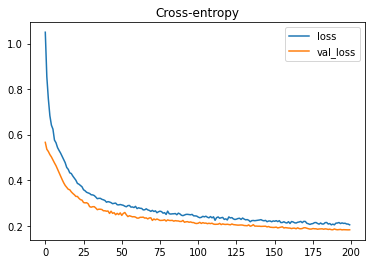

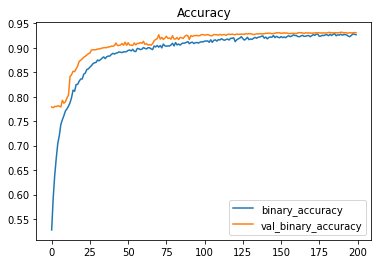

In [19]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping],
    
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [20]:
preds_test= model.predict(X_test)
preds_test = preds_test.round()

preds_better = np.concatenate(preds_test)

preds_full = preds_better.astype(int)
print(preds_full)

[1 1 1 ... 0 0 0]


In [21]:
output = pd.DataFrame({'OfiiceCode': full_test.ObjectCode, 'Prediction': preds_full})
output.to_csv('my_result.csv', index = False)